# Assignment Week 3: Tensor and Autograd

Created by: **Shokoofa Ghods and Mohammad Nazeri**

Reference: Deep Learning with PyTorch, Eli Stevens et al., Chapter 3

## Tensors as a data structure
PyTorch uses tensors as the basic data structure to handle data. In the context of deep learning, tensors refer to generalization of vectors and matrices to an arbitary number of dimensions. Another name for the same concept is *multidimensional arrays*. The dimensionality of a tensor coincides with the number of indexes used to refer to scalar values within the tensor.



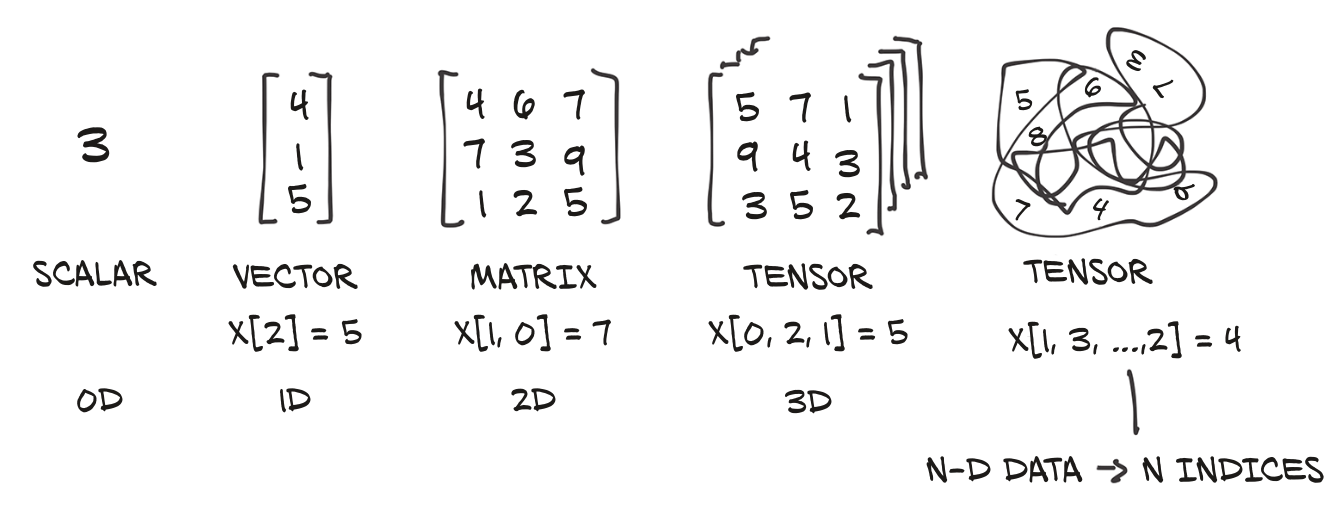

Figure is adopted from "Deep Learning with PyTorch" by Eli Stevens et al.

PyTorch is not the only library that uses multidimensional arrays, *NumPy* is also using it. And interoperability of PyTorch tensors with NumPy arrays brings PyTorch first-class integration with the rest of scientific libraries in Python such as SciPy, Scikit-learn, and Pandas.

Compared to NumPy arrays, PyTorch tensors have some superpowers such as the ability to perform fast operations on GPUs, distribute operations on multiple devices or machines, and keep track of the graph of computations that created them.

### Tensors: Multidimensional arrays
We have already learned that tensors are the fundamental data structure in PyTorch. A
tensor is an array: that is, a data structure that stores a collection of numbers that are
accessible individually using an index, and that can be indexed with multiple indices.

#### From Python lists to PyTorch tensors

In [1]:
a = [1.0, 2.0, 1.0]
# we can access the first element of the list using its corresponding index
print(a[0])

a[2] = 3.0
print(a[2])

print(a) # list is mutable

1.0
3.0
[1.0, 2.0, 3.0]


### Constructing our first tensors
Let’s construct our first PyTorch tensor and see what it looks like. It won’t be a particularly meaningful tensor for now, just three ones in a column:

In [2]:
import torch  # first things first

a = torch.ones(3)  # create a one dimensional tensor of size 3 filled with ones
print(a)

print(a[1])

a[2] = 2.0
print(a)

tensor([1., 1., 1.])
tensor(1.)
tensor([1., 1., 2.])


### Difference between PyTorch Tensors and Python Lists

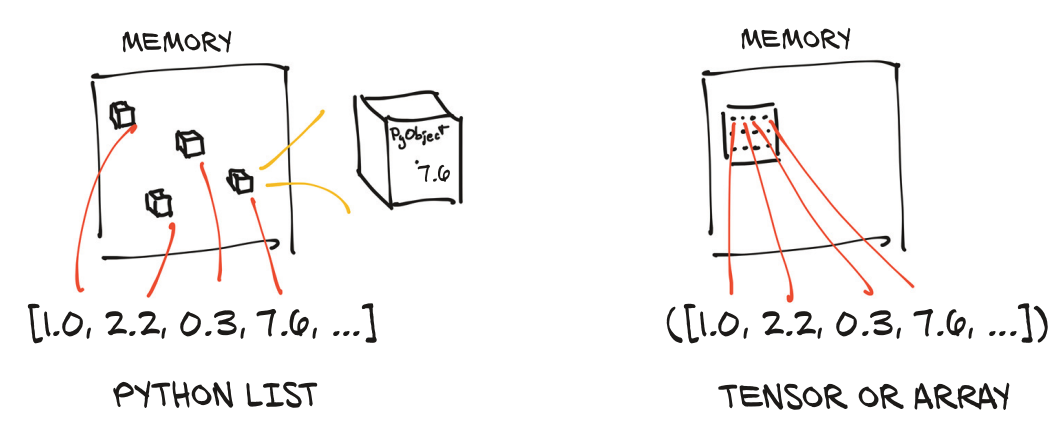

Figure is adopted from "Deep Learning with PyTorch" by Eli Stevens et al.

Tensor elements should all be of the same type.

We can turn Python lists with the same items to tensors as follows:

In [3]:
# Here are the coordinates (X, Y) of a triangle in 2D space
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
print(points)
print(points[0, 1])  # This returns the Y-coordinate of the zeroth point in our dataset

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])
tensor(1.)



### Indexing tensors
What if we need to obtain a tensor containing all points but the first? That’s easy using
range indexing notation, which also applies to standard Python lists. Here’s a
reminder:

In [4]:
some_list = list(range(6))
print(some_list[:])
print(some_list[1:4])
print(some_list[1:])
print(some_list[:4])
print(some_list[:-3])
print(some_list[1:4:2]) # [start:end:step]

[0, 1, 2, 3, 4, 5]
[1, 2, 3]
[1, 2, 3, 4, 5]
[0, 1, 2, 3]
[0, 1, 2]
[1, 3]


To achieve our goal, we can use the same notation for PyTorch tensors, with the added benefit that, just as in NumPy and other Python scientific libraries, we can use range
indexing for each of the tensor’s dimensions:

In [5]:
print(points)
print(points[1:])
print(points[1:, :])
print(points[1:, 0])
print('None: ', points[None])  # adds a dimension of 1 at the beginning, just like unsqueeze
print('Unsq: ', points.unsqueeze(dim=0)) # dim defines where the additional dimension should be added

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])
tensor([[5., 3.],
        [2., 1.]])
tensor([[5., 3.],
        [2., 1.]])
tensor([5., 2.])
None:  tensor([[[4., 1.],
         [5., 3.],
         [2., 1.]]])
Unsq:  tensor([[[4., 1.],
         [5., 3.],
         [2., 1.]]])


## Tensor element types
So far, we have covered the basics of how tensors work, but we have not yet touched on
what kinds of numeric types we can store in a `Tensor`.
- *Numbers in Python are objects.* Whereas a floating-point number might require
only, for instance, 32 bits to be represented on a computer, Python will convert
it into a full-fledged Python object with reference counting, and so on. This
operation, called boxing, is not a problem if we need to store a small number of
numbers, but allocating millions gets very inefficient.
- *Lists in Python are meant for sequential collections of objects.* There are no operations
defined for, say, efficiently taking the dot product of two vectors, or summing vectors together. Also, Python lists have no way of optimizing the layout of their contents in memory, as they are indexable collections of pointers to Python objects
(of any kind, not just numbers). Finally, Python lists are one-dimensional, and
although we can create lists of lists, this is again very inefficient.
- *The Python interpreter is slow compared to optimized, compiled code.* Performing mathematical operations on large collections of numerical data can be much faster
using optimized code written in a compiled, low-level language like C.

For these reasons, data science libraries rely on NumPy or introduce dedicated data
structures like PyTorch tensors, which provide efficient low-level implementations of
numerical data structures and related operations on them, wrapped in a convenient
high-level API. To enable this, the objects within a tensor must all be numbers of the
same type, and PyTorch must keep track of this numeric type.

### Specifying the numeric type with dtype
The `dtype` argument to tensor constructors (that is, functions like `tensor` , `zeros` , and
`ones`) specifies the numerical data (d) type that will be contained in the tensor. The
data type specifies the possible values the tensor can hold (integers versus floating-
point numbers) and the number of bytes per value. The `dtype` argument is deliberately similar to the standard NumPy argument of the same name. Here’s a list of the
possible values for the dtype argument:
- `torch.float32` or `torch.float` : 32-bit floating-point
- `torch.float64` or `torch.double` : 64-bit, double-precision floating-point
- `torch.float16` or `torch.half` : 16-bit, half-precision floating-point
- `torch.int8` : signed 8-bit integers
- `torch.uint8` : unsigned 8-bit integers
- `torch.int16` or `torch.short` : signed 16-bit integers
- `torch.int32` or `torch.int` : signed 32-bit integers
- `torch.int64` or `torch.long` : signed 64-bit integers
- `torch.bool` : Boolean

The default data type for tensors is 32-bit floating-point.

### A dtype for every occasion
As we will see in future, computations happening in neural networks are typically executed with 32-bit floating-point precision. Higher precision, like 64-bit, will not buy improvements in the accuracy of a model and will require more memory and computing time. The 16-bit floating-point, half-precision data type is not present natively in standard CPUs, but it is offered on modern GPUs. It is possible to switch to half-precision to decrease the footprint of a neural network model if needed, with a minor impact on accuracy.

Tensors can be used as indexes in other tensors. In this case, PyTorch expects indexing tensors to have a 64-bit integer data type. Creating a tensor with integers as arguments, such as using `torch.tensor([2, 2])`, will create a 64-bit integer tensor by default. As such, we’ll spend most of our time dealing with `float32` and `int64`.

Finally, predicates on tensors, such as `points > 1.0` , produce bool tensors indicating whether each individual element satisfies the condition. These are the numeric types in a nutshell.

### Managing a tensor’s dtype attribute

In [6]:
double_points = torch.ones(10, 2, dtype=torch.double)
short_points = torch.tensor([[1, 2], [3, 4]], dtype=torch.short)
# we can find the dtype of a tensor by accessing the corresponding attribute
short_points.dtype

torch.int16

In [7]:
# we can also use casting
double_points = torch.zeros(10, 2).double()
short_points = torch.ones(10, 2).short()
short_points.dtype

torch.int16

In [8]:
# or use the convinient method .to()
double_points = torch.zeros(10 ,2).to(torch.double)
short_points = torch.ones(10, 2).to(dtype=torch.short)
short_points.dtype

torch.int16

### Tensor API
PyTorch docs (http://pytorch.org/docs) are
exhaustive and well organized, with the tensor operations divided into groups:
- *Creation ops*—Functions for constructing a tensor, like `ones` and `from_numpy`
- *Indexing, slicing, joining, mutating ops*—Functions for changing the shape, stride,
or content of a tensor, like 
  + `transpose`
- *Math ops*—Functions for manipulating the content of the tensor through computations

  – *Pointwise ops*—Functions for obtaining a new tensor by applying a function to
each element independently, like 
  + `abs` 
  + `cos`

  – *Reduction ops*—Functions for computing aggregate values by iterating
through tensors, like   
  + `mean`   
  + `std` 
  + `norm`

  – *Comparison ops*—Functions for evaluating numerical predicates over tensors, like 
  + `equal` 
  + `max`

  – *Spectral ops*—Functions for transforming in and operating in the frequency domain, like 
  + `stft` _(Short-time Fourier transform)_
  + `hamming_window` _(Hamming window function)_

  – *Other operations*—Special functions operating on 
  + vectors, like `cross` 
  + or matrices, like `trace`

  – *BLAS and LAPACK operations*—Functions following the Basic Linear Algebra
Subprograms (BLAS) specification for scalar, vector-vector, matrix-vector,
and matrix-matrix operations
- *Random sampling*—Functions for generating values by drawing randomly from
probability distributions, like 
  + `randn` 
  + `normal`
- *Serialization*—Functions for saving and loading tensors, like 
  + `load` 
  + `save`
- *Parallelism*—Functions for controlling the number of threads for parallel CPU
execution, like 
  + `set_num_threads`

## Moving tensors to the GPU
So far in this chapter, when we’ve talked about storage, we’ve meant memory on the
CPU. PyTorch tensors also can be stored on a different kind of processor: a graphics
processing unit (GPU). Every PyTorch tensor can be transferred to (one of) the GPU(s) in order to perform massively parallel, fast computations. All operations that will be performed on the tensor will be carried out using GPU-specific routines that come with PyTorch.
### Managing a tensor’s device attribute
In addition to `dtype` , a PyTorch `Tensor` also has the notion of `device` , which is where
on the computer the tensor data is placed. Here is how we can create a tensor on the
GPU by specifying the corresponding argument to the constructor:

In [9]:
points_gpu = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]], dtype=torch.float, device='cuda')
# or
points_gpu = points.to(device='cuda')

Doing so returns a new tensor that has the same numerical data, but stored in the
RAM of the GPU, rather than in regular system RAM. Now that the data is stored
locally on the GPU, we’ll start to see the speedups mentioned earlier when performing mathematical operations on the tensor. In almost all cases, CPU- and GPU-based
tensors expose the same user-facing API, making it much easier to write code that is
agnostic to where, exactly, the heavy number crunching is running.

If our machine has more than one GPU, we can also decide on which GPU we allocate the tensor by passing a zero-based integer identifying the GPU on the machine,
such as

In [10]:
points_gpu = points.to(device='cuda:0')

In [11]:
points = 2 * points  # multiplication performed on CPU
points_gpu = 2 * points.to(device='cuda')  # multiplication performed on GPU

Note that the `points_gpu` tensor is not brought back to the CPU once the result has
been computed. Here’s what happened in this line:

1.   The points tensor is copied to the GPU.
2.   A new tensor is allocated on the GPU and used to store the result of the multiplication.
3.   A handle to that GPU tensor is returned.

Therefore, if we also add a constant to the result
```python
points_gpu = points_gpu + 4
```
the addition is still performed on the GPU, and no information flows to the CPU
(unless we print or access the resulting tensor). In order to move the tensor back to
the CPU, we need to provide a `cpu` argument to the to method, such as

In [12]:
points_cpu = points_gpu.to(device='cpu')

We can also use the shorthand methods `cpu` and `cuda` instead of the to method to achieve the same goal:

In [13]:
points_gpu = points.cuda()  # defaults to GPU index 0
points_gpu = points.cuda(0)
points_cpu = points.cpu()

A better and more dynamic approach would be:

In [14]:
my_device = torch.device('cuda:0') if torch.cuda.is_available() else 'cpu'
print(my_device)
points_gpu = points.to(device=my_device)
print(points_gpu)
out = 4 + points_gpu
print(out)

cuda:0
tensor([[ 8.,  2.],
        [10.,  6.],
        [ 4.,  2.]], device='cuda:0')
tensor([[12.,  6.],
        [14., 10.],
        [ 8.,  6.]], device='cuda:0')


## **Exercise 1**: Creating a Grayscale image

Create a 3-channel random image (you can generate a 256x256 RGB image) using `randn` method and data type of `float32`. Or, read an actual colored image using `PIL` library and cast it to a tensor of `float32` type.

The goal is to convert the colored image into a grayscale one. The naive approach would be to _average_ the values between all channels.

Load required libraries:

In [15]:
import torch
import numpy as np
from PIL import Image

In [16]:
img = np.array(Image.open("/kaggle/input/cat-dataset/CAT_00/00000001_000.jpg")) # change the file name
print(img.shape)
# TODO: convert numpy's ndarray to pytorch's tensor
img = torch.as_tensor(img,dtype=torch.float32)
print(img.mean())
# or
# TODO: create a random tensor with data type float32
# img = torch.randn(...)
img = torch.randn((500,375,3), dtype=torch.float32)
print(img.shape)
print(type(img))

# TODO: calculate the average between channels
print(img.mean())

(500, 375, 3)
tensor(104.3279)
torch.Size([500, 375, 3])
<class 'torch.Tensor'>
tensor(0.0003)


Now that you have a naive implementation, let's make it more proper by giving different channels different weights. You can use these weights `[0.2126, 0.7152, 0.0722]` to calculate the weighted average of different channels and compare the result with the naive approach.

In [17]:
img.shape

torch.Size([500, 375, 3])

In [18]:
img.shape

torch.Size([500, 375, 3])

In [19]:
# TODO: create tensor weight with data type float32
weight = torch.tensor([0.2126,0.7152,0.0722],dtype=torch.float32)
print(weight.shape)
# TODO: multiply weight tensor with the image on channel dim
# Hint: you should use unsqueeze() method first. You can read more about here: https://pytorch.org/docs/stable/generated/torch.unsqueeze.html
weighted_channels = torch.matmul(img,torch.unsqueeze(weight,1))
print(weighted_channels.shape)
# TODO: take average on channels
weighted_average = weighted_channels.mean()
print(weighted_average)

torch.Size([3])
torch.Size([500, 375, 1])
tensor(0.0006)


In [20]:
print(weight.shape)
print(torch.unsqueeze(weight,1).shape)

torch.Size([3])
torch.Size([3, 1])


Try to move the tensors to the GPU and calculate the weighted average again. Do you see any difference?

In [21]:
# check if cuda is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# TODO: move the tensors to GPU
weight_gpu = torch.tensor([0.2126,0.7152,0.0722],dtype=torch.float32).to(device)
img_gpu = img.to(device)
weighted_average_gpu = torch.matmul(img_gpu,torch.unsqueeze(weight_gpu,1))
print(f"Weight is on device {weight_gpu.device}!")
print(f"Image is on device {img_gpu.device}!")
print(f"Weighted_average is on device {weighted_average_gpu.device}!")

# TODO: return the result to CPU
weighted_average_cpu = weighted_average_gpu.cpu()

print(f"Weighted_average is on device {weighted_average_cpu.device}!")

Weight is on device cuda:0!
Image is on device cuda:0!
Weighted_average is on device cuda:0!
Weighted_average is on device cpu!


## **Exercise 2**: Calculate the partial derivatives

Assume that you have function $L$ where $L = \sum\frac{1}{2}(y - \hat{y})^2$ and $\hat{y} = wx + b$. Your task is to calculate the partial derivate of $L$ with respect to only $w$, $b$. To this end, please write the formulas in the cell below with the given initial values and then return the $\frac{\partial L}{\partial w}$ and $\frac{\partial L}{\partial b}$.

Initial values:
 - `w = [0.2, 0.5]`

 - `b = [0.1, 0.7]`

 - `x = [2, 3]`
 
 - `y = [5, 7]`

In [22]:
# TODO: initialize w, b, x, y tensors, all with float32 data type and on GPU
# Hint: note that only w and b require grad.
w = torch.tensor([0.2,0.5],requires_grad=True,dtype=torch.float32)
b = torch.tensor([0.1,0.7],requires_grad=True,dtype=torch.float32)
x = torch.tensor([2,3],dtype=torch.float32)
y = torch.tensor([5,7],dtype=torch.float32)

# Forward step
# TODO: 
y_hat = torch.matmul(w,torch.unsqueeze(x,1)) + b

# TODO:
L = torch.sum((1/2) * torch.pow((y-y_hat),2))

# backward step
L.backward(retain_graph=True)

print(f"Partial derivative with respect to w: {w.grad}")
print(f"Partial derivative with respect to b: {b.grad}")

print(f"Partial derivative with respect to x: {x.grad}")

Partial derivative with respect to w: tensor([-14.8000, -22.2000])
Partial derivative with respect to b: tensor([-3.0000, -4.4000])
Partial derivative with respect to x: None


What is the grad function (what function creates $L$) of $L$?

In [25]:
# loss.retain_grad()
# print(loss.grad)
L.grad_fn

What if we dont use $\sum$ and calculate the gradient? Can you make this $L = \frac{1}{2}(y - \hat{y})^2$ work as well?

In [26]:
# since we are not summing the loss hence there are more than one loss
L= (1/2) * torch.pow((y-y_hat),2)
L.sum().backward(retain_graph=True) # We use loss.sum.backward because there are more than one loss
print(f"Partial derivative with respect to w: {w.grad}")
print(f"Partial derivative with respect to b: {b.grad}")

Partial derivative with respect to w: tensor([-29.6000, -44.4000])
Partial derivative with respect to b: tensor([-6.0000, -8.8000])


## **Exercise 3:** Freezing network weights

[Resnet](https://arxiv.org/abs/1512.03385?context=cs) is one of the ground-breaking architectures in recent years. We can easily access it via torchvision: 

In [27]:
import torchvision

# Load the model with pretrained weights
model = torchvision.models.resnet50(pretrained=True)

# Freeze model parameters by setting their requires_grad attribute to False
for param in model.parameters():
    param.requires_grad = False

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 158MB/s] 


Now that we have a frozen model, try to feed it an image (you can use the image from E1. Note that you need to add additional batch dimension to that image).

In [28]:
img = torch.randn(1, 3, 224, 224, dtype=torch.float) # you can use this random image as well
y_hat = model(img)
# Arbitrary label
y = torch.zeros_like(y_hat)
y[0, 3] = 1
# TODO: Calculate euclidean distance between y_hat and y
loss = torch.cdist(y_hat,y)
# If we donot do loss.requires_grad = True then, it gives a error that the loss function donot have a grad_function
loss.requires_grad = True
# print(loss)

Now call backward on loss function, what do you expect to happen?

In [29]:
loss.backward(retain_graph=True)

Is it what you expected? Either way, why do you think they are all None?

What should we do if want to have the grads again? Complete the cell below to acheive this goal.

In [30]:
# TODO: unfroze the weights by doing the opposite of what you did before

model = torchvision.models.resnet50(pretrained=True)
for param in model.parameters():
    param.requires_grad = True
img = torch.randn(1, 3, 224, 224, dtype=torch.float) # you can use this random image as well
y_hat = model(img)
y = torch.zeros_like(y_hat)
y[0, 3] = 1
loss = torch.cdist(y_hat,y)
# loss.requires_grad = True
loss.backward(retain_graph=True)

# Reference:

Deep Learning with PyTorch, Eli Stevens et al., Chapter 3

